# Data Pre-processing

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FilePath = "risk_factors_cervical_cancer.csv"
cervical_raw = pd.read_csv(FilePath)
cervical_raw.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


From the above chart, we can know that there is some missing values wrote as "?". Check the dataset to see if there is any other abnormal values in the dataset.

In [334]:
cervical_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

Seems like we are having some missing values which we will replace by Numpy's NaN for now.
"?" as palceholders for missing values.

In [335]:
cervical_nan = cervical_raw.replace('?', np.nan)
# Check null values of each column
cervical_nan.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

### Missing value visualisation
To run this kernel, you may need to install 'missingno' module at first by: 

pip install missingno

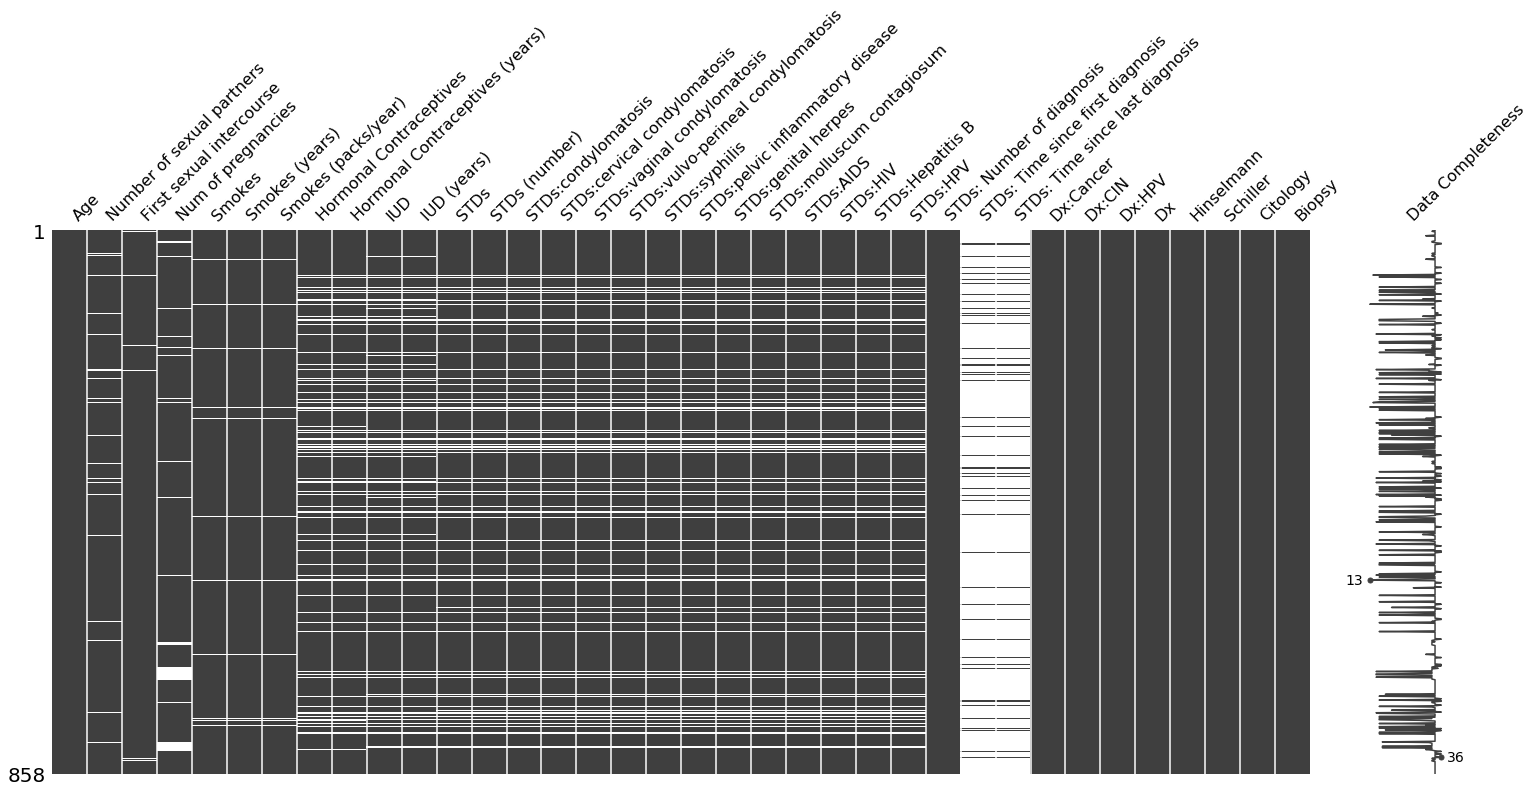

In [337]:
import missingno as msno
msno.matrix(cervical_nan, labels=True)
#msno.bar(cervical_nan)

As we can see from the infomation table, the types of some attributes are not correct. "Object" type cannot be used in clasification procedure, we need to change it to numeric types.

In [10]:
cervical_cancer = cervical_nan.apply(pd.to_numeric)
# Check the types of attributes again
cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

Now, it's time to handle the nan values introduced earlier. 
For the continuous variables, it will be replaced by the corresponding medians; for discrete variables, it will be replaced by 0 or 1.

In [255]:
# filling nan values with median for continuous variables
cervical_cancer['Number of sexual partners'] = cervical_cancer['Number of sexual partners'].fillna(cervical_cancer['Number of sexual partners'].median())
cervical_cancer['First sexual intercourse'] = cervical_cancer['First sexual intercourse'].fillna(cervical_cancer['First sexual intercourse'].median())
cervical_cancer['Num of pregnancies'] = cervical_cancer['Num of pregnancies'].fillna(cervical_cancer['Num of pregnancies'].median())
cervical_cancer['Smokes (years)'] = cervical_cancer['Smokes (years)'].fillna(cervical_cancer['Smokes (years)'].median())
cervical_cancer['Smokes (packs/year)'] = cervical_cancer['Smokes (packs/year)'].fillna(cervical_cancer['Smokes (packs/year)'].median())
cervical_cancer['Hormonal Contraceptives (years)'] = cervical_cancer['Hormonal Contraceptives (years)'].fillna(cervical_cancer['Hormonal Contraceptives (years)'].median())
cervical_cancer['IUD (years)'] = cervical_cancer['IUD (years)'].fillna(cervical_cancer['IUD (years)'].median())
cervical_cancer['STDs (number)'] = cervical_cancer['STDs (number)'].fillna(cervical_cancer['STDs (number)'].median())


In [256]:
# filling nan values with 0 or 1 for categorical variables
cervical_cancer['Smokes'] = cervical_cancer['Smokes'].fillna(1.0)
cervical_cancer['Hormonal Contraceptives'] = cervical_cancer['Hormonal Contraceptives'].fillna(1.0)
cervical_cancer['IUD'] = cervical_cancer['IUD'].fillna(1.0)
cervical_cancer['STDs'] = cervical_cancer['STDs'].fillna(1.0)


As known from the attributes, 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' are related to 'STDs'. So we need to fill nan values in these two attributes based on the values of 'STDs'.

In [274]:
l = (cervical_cancer['STDs']==1)
cervical_cancer.loc[l,'STDs: Time since first diagnosis'] = cervical_cancer.loc[l,'STDs: Time since first diagnosis'].fillna(cervical_cancer['STDs: Time since first diagnosis'].median())
cervical_cancer.loc[l,'STDs: Time since last diagnosis'] = cervical_cancer.loc[l,'STDs: Time since last diagnosis'].fillna(cervical_cancer['STDs: Time since last diagnosis'].median())
cervical_cancer['STDs: Time since last diagnosis'].fillna(0, inplace = True)
cervical_cancer['STDs: Time since first diagnosis'].fillna(0, inplace = True)

cervical_cancer['STDs: Time since last diagnosis'].isnull().sum()

0

### Delete some attributes

When answering the questions, patients can choose not to answer resulting in missing values. Categorical attributes like specific types of SDT are difficult to fill missing values with conventional approaches. i.e. there are numbers of SDTs but we cannot assume which one the patient has. 

There are two ways to handle: 1. delete these attributes; 2. or delete the corresponding missing samples. Since we don't need to focus on the specific SDTs in this task, we will delete these attributes from the dataset.

In [275]:
df = cervical_cancer.drop(['STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                          'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
                          'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 24 columns):
Age                                 858 non-null int64
Number of sexual partners           858 non-null float64
First sexual intercourse            858 non-null float64
Num of pregnancies                  858 non-null float64
Smokes                              858 non-null float64
Smokes (years)                      858 non-null float64
Smokes (packs/year)                 858 non-null float64
Hormonal Contraceptives             858 non-null float64
Hormonal Contraceptives (years)     858 non-null float64
IUD                                 858 non-null float64
IUD (years)                         858 non-null float64
STDs                                858 non-null float64
STDs (number)                       858 non-null float64
STDs: Number of diagnosis           858 non-null int64
STDs: Time since first diagnosis    858 non-null float64
STDs: Time since last diagnosis     858 non-

Some attributes, such as 'Dx:Cancer', 'Dx:CIN', and 'Hinselmann', are traditional scrrening methods that are used to diagnose cervical cancer. So we need to remove them from the dataset.

In [276]:
df = df.drop(['Dx:Cancer', 'Dx:CIN', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 18 columns):
Age                                 858 non-null int64
Number of sexual partners           858 non-null float64
First sexual intercourse            858 non-null float64
Num of pregnancies                  858 non-null float64
Smokes                              858 non-null float64
Smokes (years)                      858 non-null float64
Smokes (packs/year)                 858 non-null float64
Hormonal Contraceptives             858 non-null float64
Hormonal Contraceptives (years)     858 non-null float64
IUD                                 858 non-null float64
IUD (years)                         858 non-null float64
STDs                                858 non-null float64
STDs (number)                       858 non-null float64
STDs: Number of diagnosis           858 non-null int64
STDs: Time since first diagnosis    858 non-null float64
STDs: Time since last diagnosis     858 non-

#### Dataframe used in part 1
Apply one-hot coding on categorical types except for the classification attribute.

In [277]:
df = pd.get_dummies(data = df, columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Dx:HPV'])
df.isnull().sum()

Age                                 0
Number of sexual partners           0
First sexual intercourse            0
Num of pregnancies                  0
Smokes (years)                      0
Smokes (packs/year)                 0
Hormonal Contraceptives (years)     0
IUD (years)                         0
STDs (number)                       0
STDs: Number of diagnosis           0
STDs: Time since first diagnosis    0
STDs: Time since last diagnosis     0
Dx                                  0
Smokes_0.0                          0
Smokes_1.0                          0
Hormonal Contraceptives_0.0         0
Hormonal Contraceptives_1.0         0
IUD_0.0                             0
IUD_1.0                             0
STDs_0.0                            0
STDs_1.0                            0
Dx:HPV_0                            0
Dx:HPV_1                            0
dtype: int64

#### Dataframe used in part 2
Create a new classification attribute "AdvancedScreening", indicating whether a patient need take advanced screening or not. Since Schiller’s test and Pap Smear are both screening method for early carcinoma or Dysplasia cervix, only use other three screening method as advanced screening methods.

In [278]:
AdvancedScreening = cervical_cancer['Hinselmann'] + cervical_cancer['Citology'] + cervical_cancer['Biopsy']
#AdvancedScreening.value_counts()
for i in range(858):
    if AdvancedScreening[i] > 0:
        AdvancedScreening[i] = 1

AdvancedScreening.value_counts()
type(AdvancedScreening[2])

# Create a new dataframe
df_advanced = df.drop('Dx', axis = 1)
df_advanced['AdvancedScreening'] = AdvancedScreening
df_advanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 23 columns):
Age                                 858 non-null int64
Number of sexual partners           858 non-null float64
First sexual intercourse            858 non-null float64
Num of pregnancies                  858 non-null float64
Smokes (years)                      858 non-null float64
Smokes (packs/year)                 858 non-null float64
Hormonal Contraceptives (years)     858 non-null float64
IUD (years)                         858 non-null float64
STDs (number)                       858 non-null float64
STDs: Number of diagnosis           858 non-null int64
STDs: Time since first diagnosis    858 non-null float64
STDs: Time since last diagnosis     858 non-null float64
Smokes_0.0                          858 non-null uint8
Smokes_1.0                          858 non-null uint8
Hormonal Contraceptives_0.0         858 non-null uint8
Hormonal Contraceptives_1.0         858 non-null u

# Part 1: Use risk factors to predict cervical cancer
### Statistical analysis

In [317]:
df['Dx'].value_counts()

0    834
1     24
Name: Dx, dtype: int64

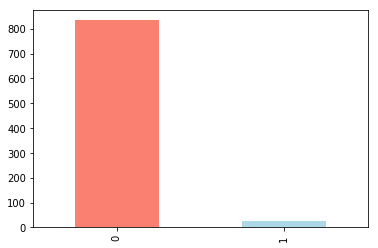

In [318]:
df['Dx'].value_counts().plot(kind = "bar", color = ['salmon', 'lightblue'])

Correlation Matrix

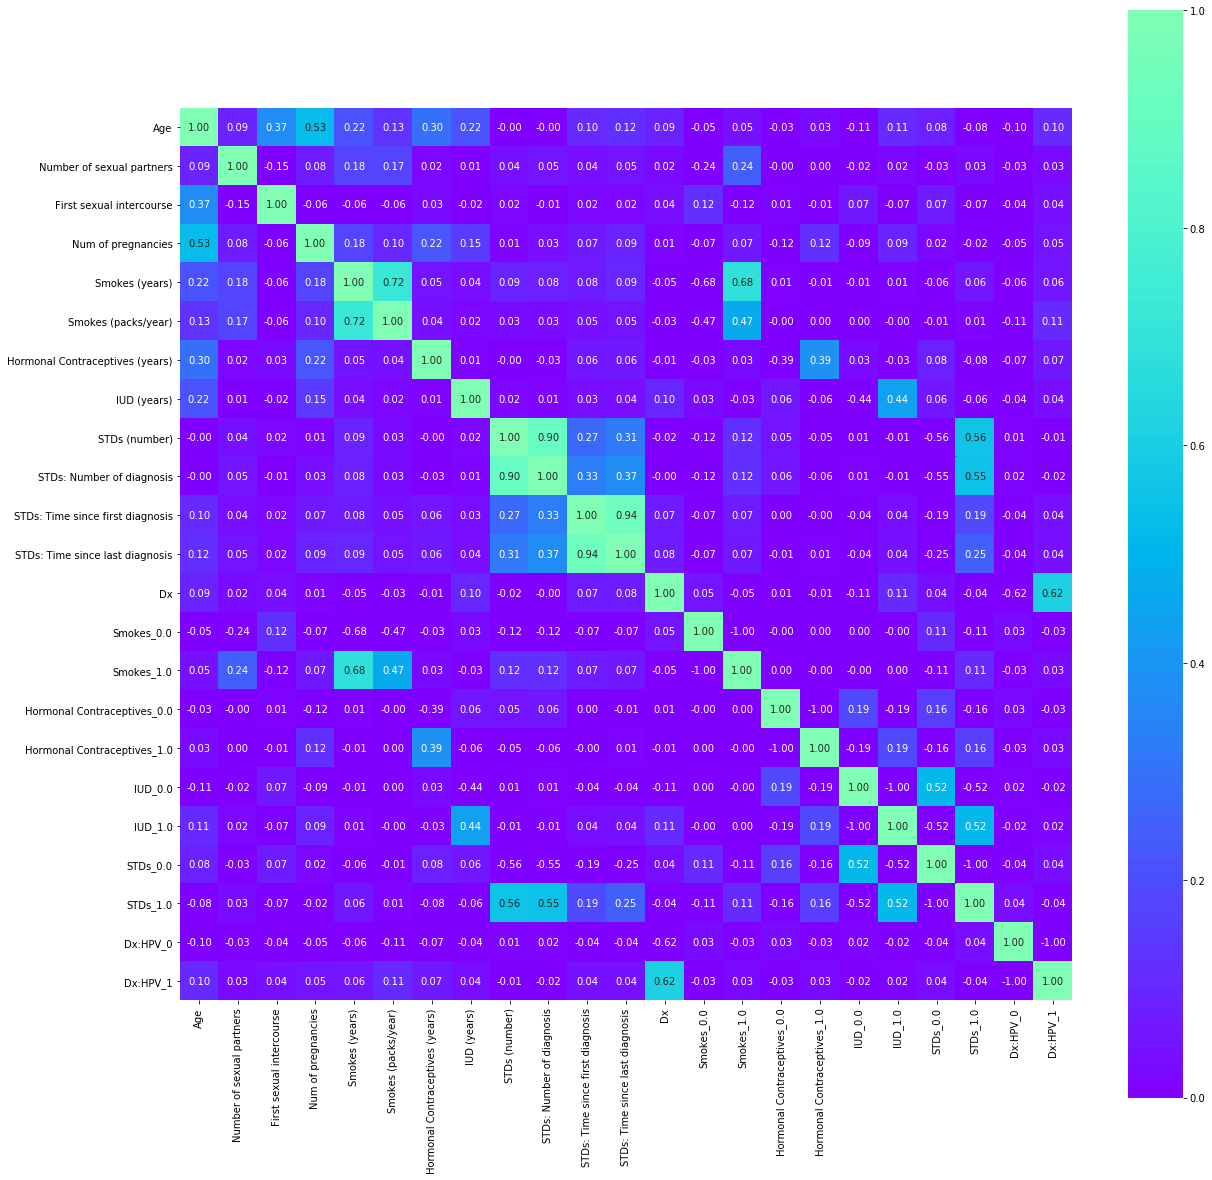

In [338]:
import seaborn as sns

corrmat = df.corr()
plt.figure(figsize = (20, 20))

sns.heatmap(corrmat, cmap = 'rainbow', cbar = True, annot = True, vmin = 0,
           vmax = 1, center = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
           yticklabels = df.columns, xticklabels = df.columns)
plt.show()

Split data into X and Y.

In [282]:
X = df.drop('Dx', axis = 1)
Y = df['Dx']

Check the basic statitical analysis of all attributtes (X).

In [283]:
X.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0.0,IUD_1.0,STDs_0.0,STDs_1.0,Dx:HPV_0,Dx:HPV_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.087413,...,0.841492,0.158508,0.313520,0.686480,0.766900,0.233100,0.785548,0.214452,0.979021,0.020979
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.302545,...,0.365430,0.365430,0.464194,0.464194,0.423052,0.423052,0.410681,0.410681,0.143398,0.143398
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the ranges of all attributes significantly differs from each other, so it is essential to apply standarisation to the dataset to reduce possible errors.

In [284]:
from sklearn.preprocessing import StandardScaler

# Standardizing the values in X
X = StandardScaler().fit_transform(X)

Split data into training set and test set

In [285]:
from sklearn.model_selection import train_test_split

np.random.seed(33)

# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Baseline model
As we can see from the Dx distribution, the dataset is extremely imbalance. We can create a baseline model by simply predicting all patients as non-cancer (0).

In [286]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix

def baselineModel(X_train, Y_train, X_test, Y_test):
    predicted = [0 for i in range(len(Y_test))]
    return predicted

Y_base_pred = baselineModel(X_train = X_train, Y_train = Y_train,
                            X_test = X_test, Y_test = Y_test)

acc_base = accuracy_score(Y_test, Y_base_pred)
acc_base

0.9767441860465116

Apply 3 different classifiers:
1. Logistical Regression
2. Support Vector Machine
3. Random Forest

In [287]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Put classification models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'SVM' : svm.SVC(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_evaluate(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(33)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [288]:
modelScores = fit_and_evaluate(models = models,
                                X_train = X_train,
                                X_test = X_test,
                                Y_train = Y_train,
                                Y_test = Y_test)

modelScores

{'Logistic Regression': 0.9883720930232558,
 'SVM': 0.9941860465116279,
 'Random Forest': 0.9883720930232558}

Let's compare all models. The red line represents the accuracy of baseline model.

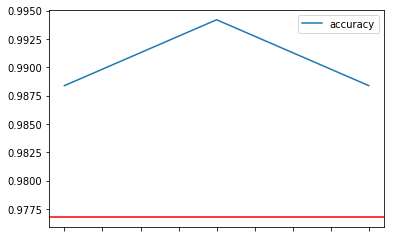

In [289]:
model_compare = pd.DataFrame(modelScores, index = ['accuracy'])
model_compare.T.plot.line()
plt.axhline(y=acc_base, color='r', linestyle='-')
plt.show()

### Hyper-parameter Tuning
It seems like that all models are working better than the baseline model on accuracy metircs. Now, it's time to tune the hyperparameters in different models.

In [290]:
# Create a hyperparameter grid for LogisticRegression
logGrid = {'C': np.logspace(-4, 4, 20),
           'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForest
randomGrid = {'n_estimators': np.arange(10, 1000, 50),
              'max_depth': [None, 3, 5, 10],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 20, 2)}

# Create a hyperparameter grid for SVM
svmGrid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
            'C': [1, 10, 100, 1000]},
           {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

Apply them on RandomizedSearchCV or GridSearchCV based on situations.

In [291]:
# Tuning logistic regression with GridSearchCV

log_model = GridSearchCV(LogisticRegression(),
                          param_grid=logGrid,
                          cv=7,
                          verbose=True)
log_model.fit(X_train, Y_train)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [292]:
log_best = log_model.best_estimator_
print(log_model.best_params_)

{'C': 0.23357214690901212, 'solver': 'liblinear'}


In [293]:
# Tuning random forest classifier with RandomizedSearchCV

np.random.seed(33)

random_model = RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions=randomGrid,
                                  cv=10,
                                  n_iter=20,
                                  verbose=True)
random_model.fit(X_train, Y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960]), 'max_depth': [None, 3, 5, 10], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbos

In [294]:
random_best =random_model.best_estimator_
print(random_model.best_params_)

{'n_estimators': 860, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': None}


In [295]:
# Tuning Support Vector Machine with GridSearchCV
#svm_model = tuningProcess(svmGrid, 'SVM')

svm_model = GridSearchCV(svm.SVC(),
                          param_grid=svmGrid,
                          cv=7,
                          verbose=True)
svm_model.fit(X_train, Y_train)

Fitting 7 folds for each of 12 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:  3.8min finished


GridSearchCV(cv=7, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [296]:
svm_best = svm_model.best_estimator_
print(svm_model.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


Generate classification reports for different classifiers.

In [297]:
log_pred = log_best.predict(X_test)
print(metrics.classification_report(Y_test, log_pred))
print(accuracy_score(Y_test, log_pred))

random_pred = random_best.predict(X_test)
print(metrics.classification_report(Y_test, random_pred))
print(accuracy_score(Y_test, random_pred))

svm_pred = svm_best.predict(X_test)
print(metrics.classification_report(Y_test, svm_pred))
print(accuracy_score(Y_test, svm_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       168
          1       0.75      0.75      0.75         4

avg / total       0.99      0.99      0.99       172

0.9883720930232558
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       168
          1       0.75      0.75      0.75         4

avg / total       0.99      0.99      0.99       172

0.9883720930232558
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       168
          1       0.75      0.75      0.75         4

avg / total       0.99      0.99      0.99       172

0.9883720930232558


### ROC Curve

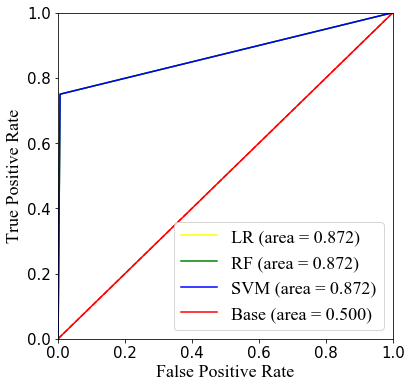

In [298]:
from sklearn import metrics

Font={'size':18, 'family':'Times New Roman'}
label = Y_test
log_pred = log_model.predict(X_test)
random_pred = random_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

fpr1,tpr1,thres1 = metrics.roc_curve(label, log_pred)
fpr2,tpr2,thres2 = metrics.roc_curve(label, random_pred)
fpr3,tpr3,thres3 = metrics.roc_curve(label, svm_pred)
fpr4,tpr4,thres4 = metrics.roc_curve(label, Y_base_pred)
log_roc_auc = metrics.auc(fpr1, tpr1)
random_roc_auc = metrics.auc(fpr2, tpr2)
svm_roc_auc = metrics.auc(fpr3, tpr3)
base_roc_auc = metrics.auc(fpr4, tpr4)

plt.figure(figsize=(6,6))
plt.plot(fpr1, tpr1, 'b', label = 'LR (area = %0.3f)' % log_roc_auc, color='Yellow')
plt.plot(fpr2, tpr2, 'b', label = 'RF (area = %0.3f)' % random_roc_auc, color='Green')
plt.plot(fpr3, tpr3, 'b', label = 'SVM (area = %0.3f)' % svm_roc_auc, color='Blue')
plt.plot(fpr4, tpr4, 'b', label = 'Base (area = %0.3f)' % base_roc_auc, color='Red')
plt.legend(loc = 'lower right', prop=Font)
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', Font)
plt.xlabel('False Positive Rate', Font)
plt.tick_params(labelsize=15)
plt.show()

We can see from the ROC curve that, all three classifiers performs better than baseline model. However, it is wierd that all three models has the same evaluation metrics, this may be caused by the highly imbalanced dataset and small size of this dataset.

# Part 2: Use risk factors to predict whether an advanced screening method should be taken or not
### Statistical analysis

In [299]:
df_advanced['AdvancedScreening'].value_counts()

0    770
1     88
Name: AdvancedScreening, dtype: int64

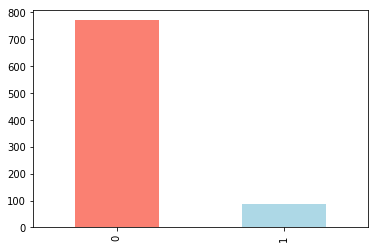

In [300]:
df_advanced['AdvancedScreening'].value_counts().plot(kind = "bar", color = ['salmon', 'lightblue'])

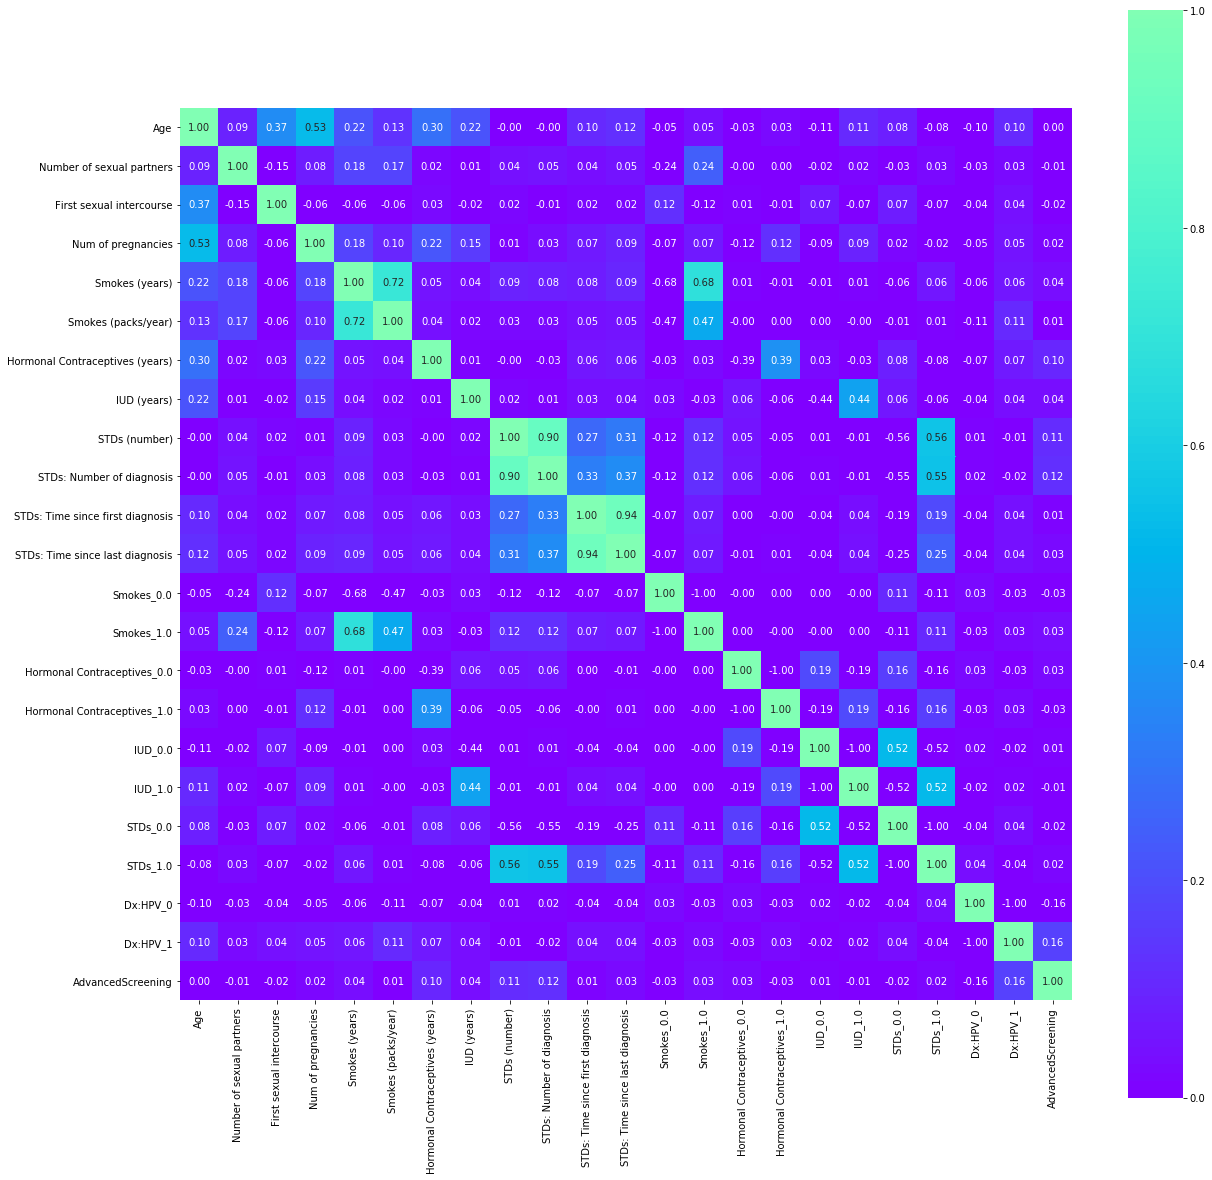

In [303]:
corrmat = df_advanced.corr()
plt.figure(figsize = (20, 20))

sns.heatmap(corrmat, cmap = 'rainbow', cbar = True, annot = True, vmin = 0,
           vmax = 1, center = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
           yticklabels = df_advanced.columns, xticklabels = df_advanced.columns)
plt.show()

As shown in the correlation matrix, we can see that attribute 'AdvancedScreening' has low correlations with other attributes, which may indicate risk factors are not proper predictors for this attribute. Try to apply the following kernels to see whether it can work.

In [304]:
x = df_advanced.drop('AdvancedScreening', axis = 1)
y = df_advanced['AdvancedScreening']

In [305]:
# Standardizing the values in x
x = StandardScaler().fit_transform(x)

In [306]:
np.random.seed(33)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Baseline model

In [307]:
y_base_pred2 = baselineModel(X_train = x_train, Y_train = y_train,
                            X_test = x_test, Y_test = y_test)

acc_base2 = accuracy_score(y_test, y_base_pred2)
acc_base2

0.8662790697674418

In [308]:
modelScores2 = fit_and_evaluate(models = models,
                                X_train = x_train,
                                X_test = x_test,
                                Y_train = y_train,
                                Y_test = y_test)

modelScores2

{'Logistic Regression': 0.872093023255814,
 'SVM': 0.872093023255814,
 'Random Forest': 0.8604651162790697}

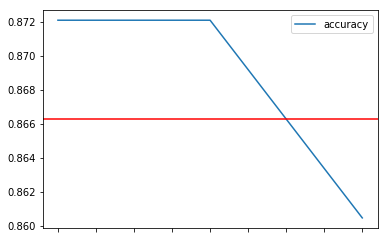

In [310]:
model_compare2 = pd.DataFrame(modelScores2, index = ['accuracy'])
model_compare2.T.plot.line()
plt.axhline(y=acc_base2, color='r', linestyle='-')
plt.show()

Apply logitic first to see if the classifier works effectively. 

In [311]:
# Tuning logistic regression with GridSearchCV

log_model2 = GridSearchCV(LogisticRegression(),
                          param_grid=logGrid,
                          cv=7,
                          verbose=True)
log_model2.fit(x_train, y_train)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [312]:
log_best2 = log_model2.best_estimator_
print(log_model2.best_params_)

{'C': 0.23357214690901212, 'solver': 'liblinear'}


In [313]:
log_pred2 = log_best2.predict(x_test)
print(metrics.classification_report(y_test, log_pred2))
print(accuracy_score(y_test, log_pred2))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93       149
          1       1.00      0.04      0.08        23

avg / total       0.89      0.87      0.82       172

0.872093023255814


From the classification report, we can see that logitic regression does not work effectively. The f1-score and recall are too low when predicting label 1, although the accuracy is pretty high.

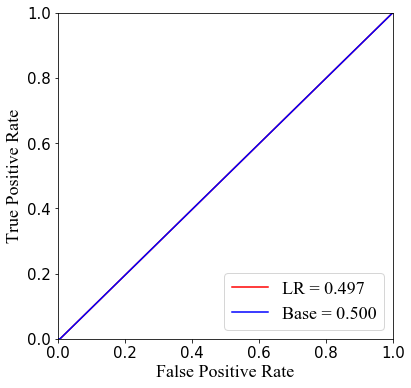

In [314]:
Font={'size':18, 'family':'Times New Roman'}
label = Y_test

fpr1,tpr1,thres1 = metrics.roc_curve(label, log_pred2)
fpr2,tpr2,thres2 = metrics.roc_curve(label, y_base_pred2)

log_roc_auc = metrics.auc(fpr1, tpr1)
base_roc_auc = metrics.auc(fpr2, tpr2)

plt.figure(figsize=(6,6))
plt.plot(fpr1, tpr1, 'b', label = 'LR = %0.3f' % log_roc_auc, color='Red')
plt.plot(fpr1, tpr1, 'b', label = 'Base = %0.3f' % base_roc_auc, color='Blue')

plt.legend(loc = 'lower right', prop=Font)
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', Font)
plt.xlabel('False Positive Rate', Font)
plt.tick_params(labelsize=15)
plt.show()

As we can see from the ROC curve, logitic regression fails in this classification problem which perform worse than random guess. This means risk factors are not proper predictors for predicting whehter a petient should take advanced screening or not.